### Vamos estudar o Algoritmo de Grover. Para isso, começaremos executando as células abaixo

Azul posição 0 

Branco posição 1

Verde posição 2

Vermelho posição 3

In [ ]:
!pip install pyfirmata

Como faremos uma prática com Arduino, execute a célula abaixo 

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import*
from qiskit.circuit import*
from qiskit.visualization import*
import pyfirmata
import time

port = '/dev/ttyACM0' # Definindo a porta, arduino de acordo com o que está no Sketch.
board = pyfirmata.Arduino(port) # Criando o objeto "board" com a respoectiva porta


def pyQuantArd(results):
	qBits = len(list(results)[0])
	N = 2**qBits
	pinAzul = 7 # posição 3 
	pinBranco = 6 # posição 2
	pinVerde = 4 # posição 1
	pinVermelho = 3 # posição 0
	
	initial_Array = np.zeros(2**qBits)
	for i in range(len(results)):
		initial_Array = initial_Array + np.identity(N)[int(list(results)[i],base = 2)]

	for i in range(5):
		time.sleep(0.1)
		board.digital[pinAzul].write(int(initial_Array[0]))
		board.digital[pinBranco].write(int(initial_Array[1]))
		board.digital[pinVerde].write(int(initial_Array[2]))
		board.digital[pinVermelho].write(int(initial_Array[3]))
		
		time.sleep(0.1)
		board.digital[pinAzul].write(0)
		board.digital[pinBranco].write(0)
		board.digital[pinVerde].write(0)
		board.digital[pinVermelho].write(0)
		time.sleep(0.1)

##### Grover com 2 QuBits

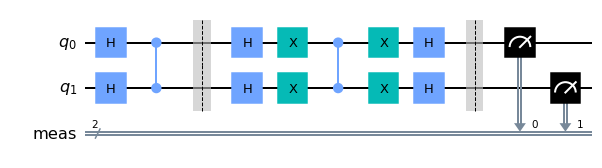

In [2]:
qBits = 2

m = 2 #Quantos Estados queremos achar
N = 2**qBits

t = int(np.pi/4*(np.sqrt(N/m))) # Números de Iterações Grover
qc = QuantumCircuit(qBits)
qc.h(range(qBits))
# Vamos definir o oráculo para o estado |11> que é o equivalente ao LED amarelo
qc.cz(0,1)
qc.barrier()
# Vamos definir o operador diffuser

for t_ in range(t):
    qc.h(range(qBits))
    qc.x(range(qBits))
    qc.cz(0,1)
    qc.x(range(qBits))
    qc.h(range(qBits))

qc.measure_all()
qc.draw('mpl')


<p> Agora, vamos extrair os resultados do circuito utilizando a função get_counts() <p>

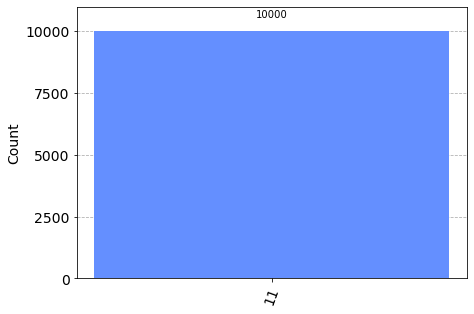

In [3]:
sim = Aer.get_backend("aer_simulator")
results = execute(qc,sim,shots = 10000).result().get_counts()
plot_histogram(results)

In [4]:
pyQuantArd(results)

<b>Exercício 1: Agora é com você. Complete o Código de Grover para Ligar o LED branco e meça o circuito</b>

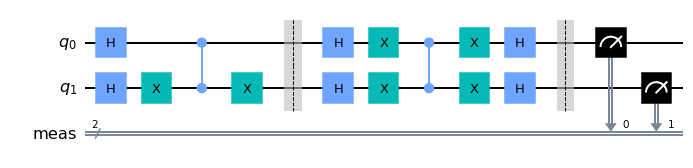

In [8]:
qBits = 2

m = 1 #Quantos Estados queremos achar


N = 2**qBits
t = int(np.pi/4*(np.sqrt(N/m))) # Números de Iterações Grover
qc = QuantumCircuit(qBits)
qc.h(range(qBits))


#Defina o Oráculo para o LED Branco

#======= COMEÇA O CÓDIGO AQUI ====== #
qc.x(1)
qc.cz(0,1)
qc.x(1)

# ======TERMINA O CÓDIGO AQUI ==== #


qc.barrier()

# Vamos definir o operador diffuser

for t_ in range(t):
    qc.h(range(qBits))
    qc.x(range(qBits))
    qc.cz(0,1)
    qc.x(range(qBits))
    qc.h(range(qBits))
#======= COMEÇA O CÓDIGO AQUI ====== #

qc.measure_all()
results = execute(qc,sim).result().get_counts()
#======= TERMINA O CÓDIGO AQUI ====== #




qc.draw('mpl')


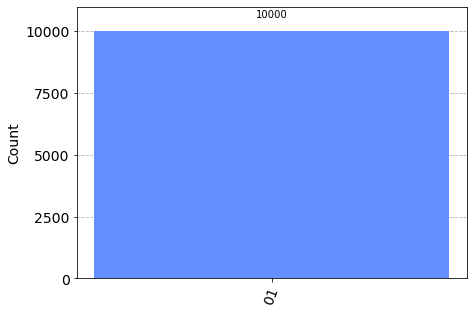

In [9]:
sim = Aer.get_backend("aer_simulator")
results = execute(qc,sim,shots = 10000).result().get_counts()
plot_histogram(results)

In [10]:
pyQuantArd(results) # COMPLETE COM O OBJETO QUE GUARDA OS RESULTADOS

### Definindo um Grover de 3 QuBits
##### Exercício 2: <p>Para isso precisamos criar uma porta multi-controlada Z, pois não existe uma porta multi-controlada Z no qiskit para 3 ou mais QuBits. 
<p>Crie uma porta multi-controle Z utilizando portas CNOTs multi-controle e Hadamards </p>
<p>Dica HXH = Z </p>

#=======================Criando uma Porta MultiControl Z==================

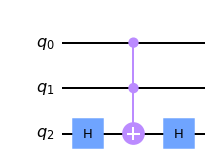

In [12]:
mcz_ = QuantumCircuit(3)

### COMEÇA O CÓDIGO AQUI
mcz_.h(-1)
mcz_.mcx([0,1],2)
mcz_.h(-1)
### TERMINA O CÓDIGO AQUI

mcz = mcz_.to_instruction(label='Multi_controlZ')
mcz_.draw('mpl')

#### Exercício 3: Crie um oráculo para 3 QuBits para medir o LED Vermelho

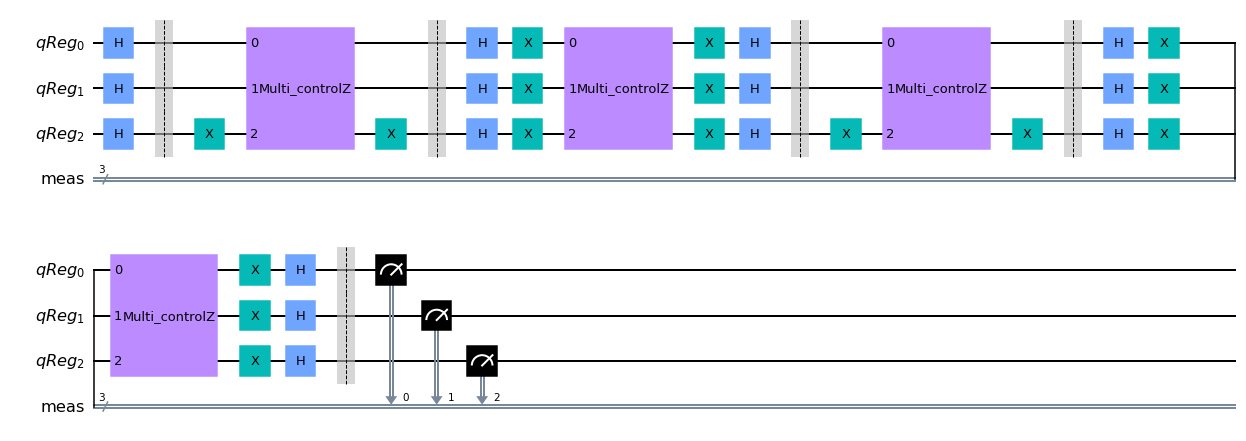

In [15]:
from qiskit import*
from qiskit.visualization import*
from qiskit.circuit import*




qBits = 3


N = 2**qBits
m = 1
t = int(np.floor(np.pi/4*(np.sqrt(N/m))))
qRegs = QuantumRegister(qBits, 'qReg')
qc = QuantumCircuit(qRegs)

[qc.h(i) for i in range(qBits)]

for t_ in range(t):
    qc.barrier()
    
    # COMECE O CÓDIGO AQUI

    qc.x(-1)
    qc.append(mcz, [0,1,2])
    qc.x(-1)
    
   
   
    # TERMINE O CÓDIGO AQUI
    
    qc.barrier()

    [qc.h(i) for i in range(qBits)]
    [qc.x(i) for i in range(qBits)]
    qc.append(mcz,[0,1,2])
    [qc.x(i) for i in range(qBits)]
    [qc.h(i) for i in range(qBits)]

qc.measure_all()


qc.draw('mpl')

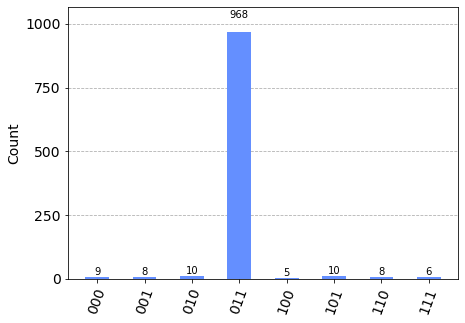

In [16]:
sim = Aer.get_backend("aer_simulator")

results = execute(qc, sim).result().get_counts()
plot_histogram(results)

In [17]:
import heapq
results  = dict(heapq.nlargest(m, results.items(), key= lambda item: item[1])) 
# Esta Função acima é para pegar os estados com maiores probabilidades

In [19]:
pyQuantArd(results) # ADICIONE OS RESULTADOS DE GROVER

<b>Exercício 4: Complete o Código de Grover para Ligar o LED Azul, LED Verde, Led Vermelho</b>

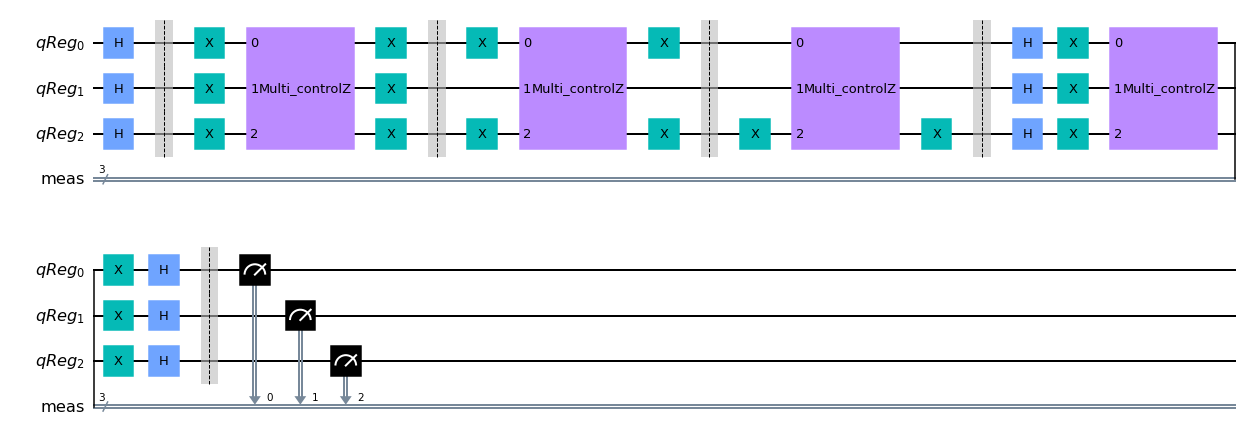

In [47]:
from qiskit import*
from qiskit.visualization import*
from qiskit.circuit import*

qBits = 3


N = 2**qBits
m = 3
t = int(np.floor(np.pi/4*(np.sqrt(N/m))))
qRegs = QuantumRegister(qBits, 'qReg')
qc = QuantumCircuit(qRegs)

[qc.h(i) for i in range(qBits)]

for t_ in range(t):
    qc.barrier()
    
    #===================== Oráculo para o LED Azul =======================
    qc.x([0,1,2])
    qc.append(mcz, [0,1,2])
    qc.x([0,1,2])
    qc.barrier()
    #===================== Oráculo para o LED Verde ======================
    qc.x([0,2])
    qc.append(mcz, [0,1,2])
    qc.x([0,2])
    qc.barrier()
    
    
    #====================== Oráculo para o LED Vermelho ======================
    qc.x([2])
    qc.append(mcz, [0,1,2])
    qc.x([2])
    
    qc.barrier()

    [qc.h(i) for i in range(qBits)]
    [qc.x(i) for i in range(qBits)]
    qc.append(mcz,[0,1,2])
    [qc.x(i) for i in range(qBits)]
    [qc.h(i) for i in range(qBits)]

qc.measure_all()


qc.draw('mpl')

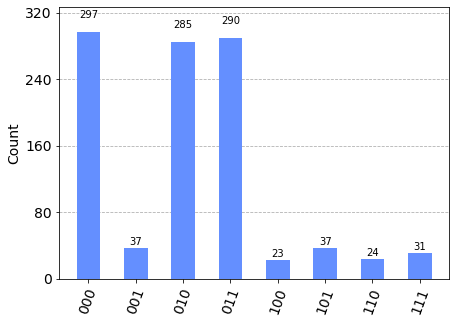

In [48]:
sim = Aer.get_backend("aer_simulator")

results = execute(qc, sim).result().get_counts()
plot_histogram(results)

In [49]:
import heapq
results  = dict(heapq.nlargest(m, results.items(), key= lambda item: item[1]))


In [50]:
pyQuantArd(results) # ADICIONE OS RESULTADOS DE GROVER

DESAFIO: A porta Hadarmad pode superpor estados de um qubit. Ao aplicar a Hadarmard em |0> temos um estado $$H|0\rangle = \frac{|0\rangle + |1\rangle}{2}$$. Se aplicarmos a Hadarmad em dois qubits teremos o estado $$H|0\rangle \otimes H|0\rangle = \frac{|00\rangle + |01\rangle + |10\rangle + |11\rangle}{4}$$ 

<p>O Desafio é para criar um algoritmo quântico que ligue os leds aleatoriamente durante 20 vezes </p>




In [78]:
import numpy as np
import matplotlib.pyplot as plt
from qiskit import*
from qiskit.circuit import*
from qiskit.visualization import*
import pyfirmata
import time

port = '/dev/ttyACM0' # Definindo a porta, arduino de acordo com o que está no Sketch.
board = pyfirmata.Arduino(port) # Criando o objeto "board" com a respoectiva porta


def pyQuantArd(results):
	qBits = len(list(results)[0])
	N = 2**qBits
	pinAzul = 7 # posição 3 
	pinBranco = 6 # posição 2
	pinVerde = 4 # posição 1
	pinVermelho = 3 # posição 0
	
	initial_Array = np.zeros(2**qBits)
	for i in range(len(results)):
		initial_Array = initial_Array + np.identity(N)[int(list(results)[i],base = 2)]

	for i in range(1):
		time.sleep(1)
		board.digital[pinAzul].write(int(initial_Array[0]))
		board.digital[pinBranco].write(int(initial_Array[1]))
		board.digital[pinVerde].write(int(initial_Array[2]))
		board.digital[pinVermelho].write(int(initial_Array[3]))
		
		time.sleep(1)
		board.digital[pinAzul].write(0)
		board.digital[pinBranco].write(0)
		board.digital[pinVerde].write(0)
		board.digital[pinVermelho].write(0)
		time.sleep(1)

In [80]:
qc = QuantumCircuit(2)
qc.h(range(2))
qc.measure_all()

for i in range(20):
    results = execute(qc,sim,shots=1).result().get_counts()
    pyQuantArd(results)
